In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##DATA GENERATOR 


In [ ]:
from PIL import Image
import cv2
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
#from resizeimage import resizeimage
import pickle
import tensorflow as tf 
from tensorflow import keras

In [ ]:
##perfectly working bro 
labels_path="/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/labels3"
patches_path="/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/patches3"
patchesTEST_path="/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/patches_TEST"
batch_size=4
# as does not load all image , load images in batches 

class DataGen(keras.utils.Sequence):
    def __init__(self,ids,path,batch_size=batch_size,image_size=512):
        self.ids=ids
        self.path=path
        self.batch_size=batch_size
        self.image_size=image_size
        self.on_epoch_end()
        
        
    def __load__(self,id_name):
        #print(self.path)
        image_path=os.path.join(self.path,"patches3",id_name)
        mask_path=os.path.join(self.path,"labels3",id_name)
        #print(image_path)
        image=cv2.imread(image_path,cv2.IMREAD_COLOR)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #plt.imshow(image,cmap="gray")
        #plt.show()
        mask=cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
        #plt.imshow(mask,cmap="gray")
        #plt.show()

        try:
          image=np.array(image)
          mask=np.array(mask)
          #print(mask)
          mask=mask>10
          #image=image/255.0
          #mask=mask/255.0
          #plt.imshow(mask,cmap="gray")
          #plt.show()
          #mask=mask>0.1
          mask=mask.astype('uint')
          #plt.imshow(mask,cmap="gray")
          #plt.show()
          #print("khtm")
          image=np.reshape(image,(512,512,3))
          mask=np.reshape(mask,(512,512,1))
        except:
          print("error"+id_name)
        return image,mask
        #which is used  to get a batch size
    def __getitem__(self,index):
        #print((index+1)*self.batch_size)
        #print(len(self.ids))
        #print(self.batch_size)
        if (index+1)*self.batch_size>len(self.ids):
            k=len(self.ids)-index*self.batch_size
        k=self.batch_size
        files_batch=self.ids[index*self.batch_size:index*self.batch_size+k]
        #print(len(files_batch))
                       
        image=[]
        mask=[]
        for id_name in files_batch:
            _img,_mask=self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
        image= np.array(image)
        mask =np.array(mask)
        return image,mask
                    
    def on_epch_end(self):
        pass
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))
      

class DataGenTEST(keras.utils.Sequence):
    def __init__(self,ids,path,batch_size=batch_size,image_size=512):
        self.ids=ids
        self.path=path
        self.batch_size=batch_size
        self.image_size=image_size
        self.on_epoch_end()
        
        
    def __load__(self,id_name):
        #print(self.path)
        image_path=os.path.join(self.path,"patches_TEST",id_name)
        mask_path=os.path.join(self.path,"labels_TEST",id_name)
        #print(image_path)
        image=cv2.imread(image_path,cv2.IMREAD_COLOR)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #plt.imshow(image,cmap="gray")
        #plt.show()
        mask=cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
        try:
          image=np.array(image)
          mask=np.array(mask)
          mask=mask>10
          #image=image/255.0
          #mask=mask/255.0
          mask=mask.astype('uint')
          image=np.reshape(image,(512,512,3))
          mask=np.reshape(mask,(512,512,1))
        except:
          print(id_name)
        return image,mask
        #which is used  to get a batch size
    def __getitem__(self,index):
        #print((index+1)*self.batch_size)
        #print(len(self.ids))
        #print(self.batch_size)
        if (index+1)*self.batch_size>len(self.ids):
            k=len(self.ids)-index*self.batch_size
        k=self.batch_size
        files_batch=self.ids[index*self.batch_size:index*self.batch_size+k]
        #print(len(files_batch))
                       
        image=[]
        mask=[]
        for id_name in files_batch:
            _img,_mask=self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
        image= np.array(image)
        mask =np.array(mask)
        return image,mask
                    
    def on_epoch_end(self):
        pass
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))
                       
                       
                    
                       


In [ ]:
val_data_size=500
train_ids = next(os.walk(patches_path))[2]
TEST_ids = next(os.walk(patchesTEST_path))[2]
TEST_ids=TEST_ids[:val_data_size]
print(np.array(train_ids).shape)
print(train_ids)
#for validation data size we have
#valid_ids = train_ids[:val_data_size]
#train_ids= train_ids[val_data_size:]
print(TEST_ids)
print(np.array(TEST_ids).shape)


(1492,)
['IDRiD_12_p16.jpg', 'IDRiD_46_p39.jpg', 'IDRiD_25_p35.jpg', 'IDRiD_38_p37.jpg', 'IDRiD_28_p18.jpg', 'IDRiD_13_p6.jpg', 'IDRiD_48_p34.jpg', 'IDRiD_32_p10.jpg', 'IDRiD_26_p31.jpg', 'IDRiD_02_p16.jpg', 'IDRiD_40_p27.jpg', 'IDRiD_48_p5.jpg', 'IDRiD_21_p10.jpg', 'IDRiD_16_p13.jpg', 'IDRiD_47_p2.jpg', 'IDRiD_23_p20.jpg', 'IDRiD_50_p0.jpg', 'IDRiD_07_p24.jpg', 'IDRiD_23_p16.jpg', 'IDRiD_48_p28.jpg', 'IDRiD_01_p17.jpg', 'IDRiD_46_p31.jpg', 'IDRiD_41_p39.jpg', 'IDRiD_30_p18.jpg', 'IDRiD_09_p10.jpg', 'IDRiD_42_p34.jpg', 'IDRiD_03_p23.jpg', 'IDRiD_42_p19.jpg', 'IDRiD_26_p2.jpg', 'IDRiD_03_p34.jpg', 'IDRiD_32_p32.jpg', 'IDRiD_37_p19.jpg', 'IDRiD_03_p13.jpg', 'IDRiD_26_p4.jpg', 'IDRiD_09_p18.jpg', 'IDRiD_25_p3.jpg', 'IDRiD_09_p21.jpg', 'IDRiD_37_p31.jpg', 'IDRiD_08_p7.jpg', 'IDRiD_16_p22.jpg', 'IDRiD_17_p38.jpg', 'IDRiD_07_p15.jpg', 'IDRiD_18_p2.jpg', 'IDRiD_11_p26.jpg', 'IDRiD_32_p39.jpg', 'IDRiD_53_p37.jpg', 'IDRiD_49_p27.jpg', 'IDRiD_07_p29.jpg', 'IDRiD_32_p35.jpg', 'IDRiD_39_p10.jpg', 

In [ ]:
path="/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/"
gen = DataGen(train_ids,path, batch_size=batch_size, image_size=512)
gen_TEST=DataGenTEST(TEST_ids,path, batch_size=batch_size, image_size=512)

x, y = gen.__getitem__(12)
print(x.shape, y.shape)
#for  i in range (4):
  #fig = plt.figure()
  #fig.subplots_adjust(hspace=0.4, wspace=0.4)

  #ax = fig.add_subplot(1, 2, 1)
  #ax.imshow(np.reshape(y[i], (512, 512)), cmap="gray")
  #ax = fig.add_subplot(1, 2, 2)
  #ax.imshow(np.reshape(x[i], (512,512,3)), cmap="gray")
  #plt.show()
x1,y1=gen_TEST.__getitem__(1)
print(x1.shape,y1.shape)



(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)


In [ ]:

#model layers 
def down_sample_block(x,filters,kernel_size=(3,3),padding="same",strides=1):
    c=keras.layers.Conv2D(filters,kernel_size,kernel_initializer = 'random_normal',padding=padding,strides=strides)(x)
    c=keras.layers.BatchNormalization()(c)
    c=keras.layers.Activation("relu")(c)
    c=keras.layers.Conv2D(filters,kernel_size,kernel_initializer = 'random_normal',padding=padding,strides=strides)(c)
    c=keras.layers.BatchNormalization()(c)
    c=keras.layers.Activation("relu")(c)
    p=keras.layers.MaxPool2D((2,2),(2,2))(c)
    p=keras.layers.Dropout(0.15)(p)
    return c,p
def upsample_block(x,skip,filters,kernel_size=(3,3),padding="same",strides=1):
    up_spl= keras.layers.Conv2DTranspose(filters,kernel_size,strides=(2,2),padding='same')(x)
    concat = keras.layers.Concatenate()([up_spl, skip])
    concat=keras.layers.Dropout(0.15)(concat)
    c = keras.layers.Conv2D(filters, kernel_size,kernel_initializer = 'random_normal', padding=padding, strides=strides)(concat)
    c=keras.layers.BatchNormalization()(c)
    c=keras.layers.Activation("relu")(c)
    #c=Dropout(0.1)(c)
    c = keras.layers.Conv2D(filters, kernel_size,kernel_initializer = 'random_normal', padding=padding, strides=strides)(c)
    c=keras.layers.BatchNormalization()(c)
    c=keras.layers.Activation("relu")(c)
    return c
def bottleneck(x,filters,kernel_size=(3,3),padding="same",strides=1):
    c=keras.layers.Conv2D(filters,kernel_size,kernel_initializer = 'random_normal',padding=padding,strides=strides)(x)
    c=keras.layers.BatchNormalization()(c)
    c=keras.layers.Activation("relu")(c)
    c=keras.layers.Conv2D(filters,kernel_size,kernel_initializer = 'random_normal',padding=padding,strides=strides)(c)
    c=keras.layers.BatchNormalization()(c)
    c=keras.layers.Activation("relu")(c)
    return c
                    

##Unet Model

In [ ]:

def UNet():
    f = [16, 32, 64, 128, 256,512,1024]
    inputs = keras.layers.Input((512, 512,3))
    
    p0 = inputs
    c1, p1 = down_sample_block(p0, f[0]) #512 ->256
    c2, p2 = down_sample_block(p1, f[1]) #256->128
    c3, p3 = down_sample_block(p2, f[2]) #128->64
    c4, p4 = down_sample_block(p3, f[3]) #64->32
    c5, p5 = down_sample_block(p4, f[4]) #32->16
    c6, p6 = down_sample_block(p5, f[5]) #16->8
    
    bn = bottleneck(p6, f[6])
    
    
    u1 = upsample_block(bn, c6, f[5]) #8 -> 16
    u2 = upsample_block(u1, c5, f[4]) #16 -> 32
    u3 = upsample_block(u2, c4, f[3]) #32 -> 64
    u4 = upsample_block(u3, c3, f[2]) #64 -> 128
    u5 = upsample_block(u4, c2, f[1]) #128 ->256
    u6 = upsample_block(u5, c1, f[0]) #265->512
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation='sigmoid')(u6)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
#from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=10),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-8),
    ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/ID-checkpnt3.h5', save_best_only=True, save_weights_only=True)
]

from keras.preprocessing.image import ImageDataGenerator
data_gen_args = dict(rotation_range=45.,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         vertical_flip=True,
                         fill_mode='reflect')  #use 'constant'??
X_datagen = ImageDataGenerator(**data_gen_args)
Y_datagen = ImageDataGenerator(**data_gen_args)

Using TensorFlow backend.


##Loss Function

In [ ]:

def BCE_(y_pred, y_true):
    # weight ratio = 9:1
    # 9-1=8
    class_weights = tf.constant([8],dtype=tf.float32)
    tensor_one = tf.constant([1],dtype=tf.float32)
    #flattenning the  y_pred and y_true
    pred_flat = tf.reshape(y_pred, [-1, 1])
    true_flat = tf.reshape(y_true, [-1, 1])
    
    weight_map = tf.multiply(true_flat, class_weights)
    weight_map = tf.add(weight_map, tensor_one)
    
    loss_map = tf.nn.sigmoid_cross_entropy_with_logits(logits=pred_flat, labels=true_flat)
    print("loss_map")
    print(loss_map)
    loss_map = tf.multiply(loss_map, weight_map)
    print(loss_map)
    loss = tf.reduce_mean(loss_map)
    return loss

In [ ]:
model=UNet()
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),loss="binary_crossentropy",metrics=["acc"])
model.summary()

W0627 20:30:19.178211 140571763906432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0627 20:30:20.174687 140571763906432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0627 20:30:21.417802 140571763906432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.op

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
path="/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/"
train_gen= DataGen(train_ids,path, batch_size=batch_size,image_size=512)
valid_gen = DataGenTEST(TEST_ids,path, batch_size=batch_size ,image_size=512)

train_steps = len(train_gen)//batch_size
valid_steps = len(TEST_ids)//batch_size

print(train_steps)

result=model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, 
                    epochs=100,callbacks=callbacks)
#result=model.fit_generator(train_gen, steps_per_epoch=train_steps, 
#                    epochs=50,callbacks=callbacks)

93
Epoch 1/100
93/93 [==============================] - 62s 672ms/step - loss: 0.4018 - acc: 0.9486 - val_loss: 0.6175 - val_acc: 0.8007
Epoch 2/100
93/93 [==============================] - 42s 450ms/step - loss: 0.3210 - acc: 0.9811 - val_loss: 0.3754 - val_acc: 0.9832
Epoch 3/100
93/93 [==============================] - 41s 439ms/step - loss: 0.2733 - acc: 0.9851 - val_loss: 0.2731 - val_acc: 0.9849
Epoch 4/100
93/93 [==============================] - 42s 450ms/step - loss: 0.2316 - acc: 0.9880 - val_loss: 0.2153 - val_acc: 0.9845
Epoch 5/100
93/93 [==============================] - 41s 441ms/step - loss: 0.2031 - acc: 0.9863 - val_loss: 0.1988 - val_acc: 0.9835
Epoch 6/100
93/93 [==============================] - 42s 449ms/step - loss: 0.1798 - acc: 0.9866 - val_loss: 0.1639 - val_acc: 0.9848
Epoch 7/100
93/93 [==============================] - 41s 443ms/step - loss: 0.1619 - acc: 0.9879 - val_loss: 0.1502 - val_acc: 0.9846
Epoch 8/100
93/93 [==============================] - 41s 44

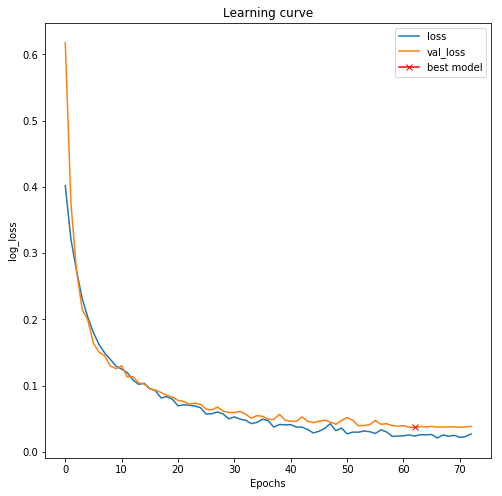

In [ ]:
import h5py
model.save_weights("/content/gdrive/My Drive/Colab Notebooks/Diabetic Retinopathy/dr11dropout.h5")
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["loss"], label="loss")
plt.plot(result.history["val_loss"], label="val_loss")
plt.plot( np.argmin(result.history["val_loss"]), np.min(result.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

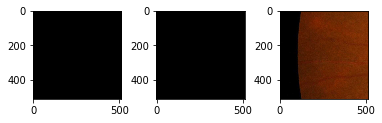

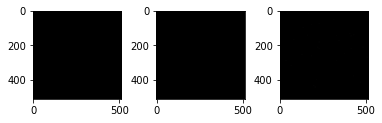

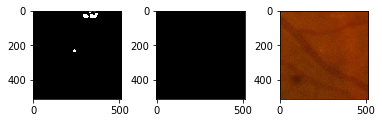

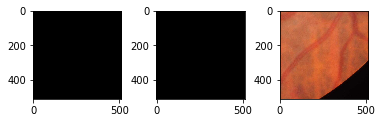

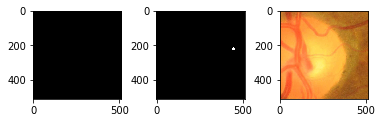

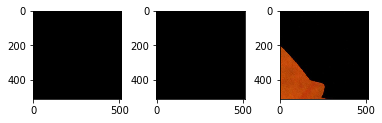

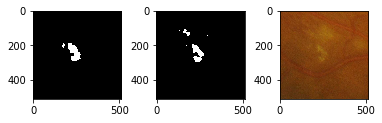

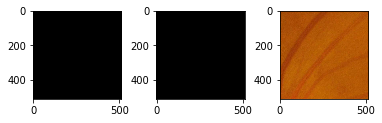

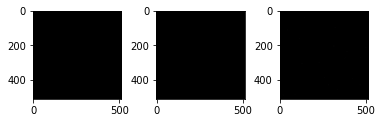

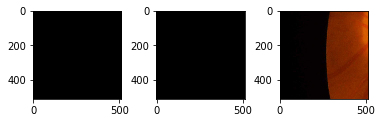

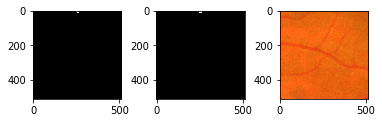

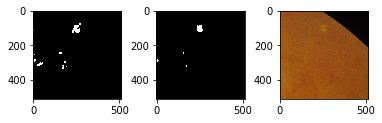

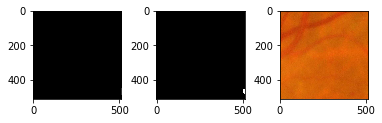

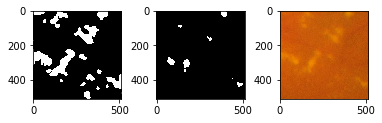

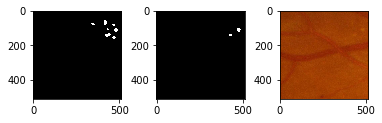

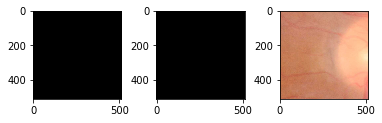

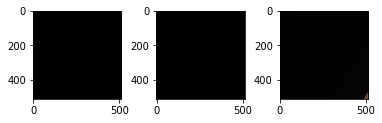

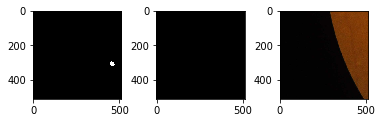

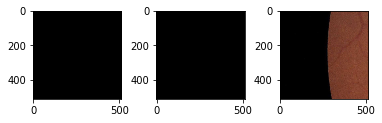

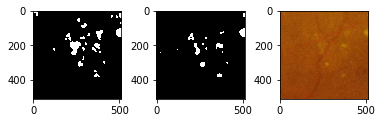

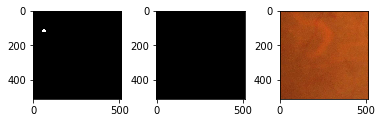

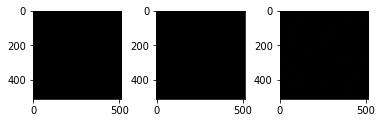

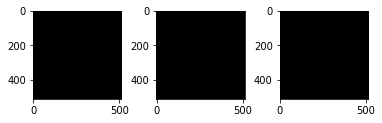

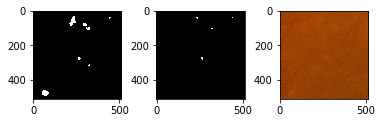

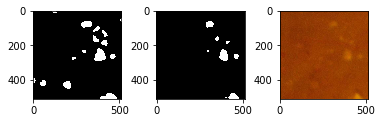

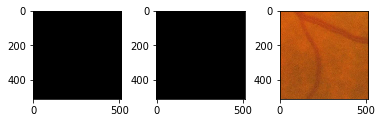

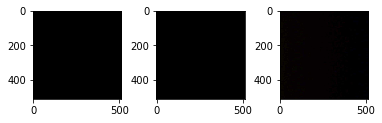

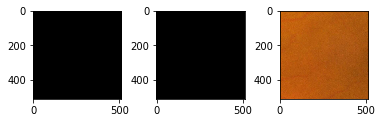

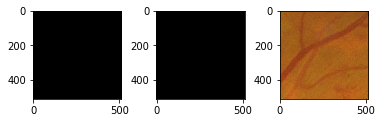

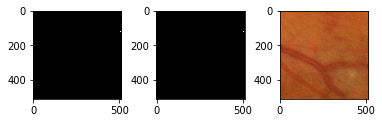

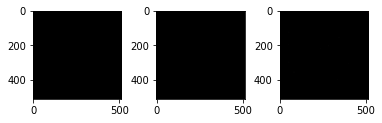

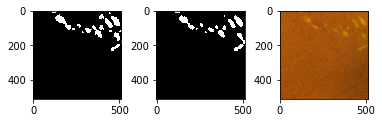

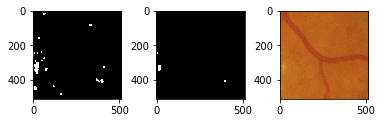

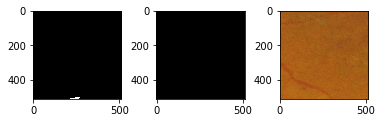

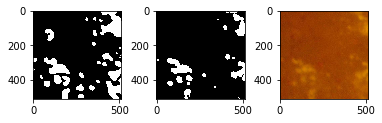

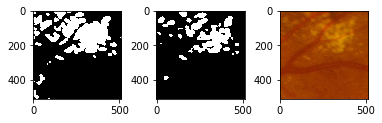

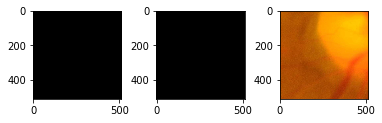

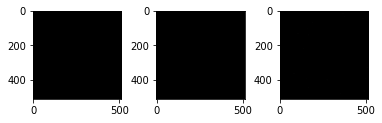

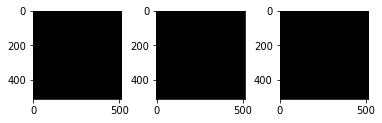

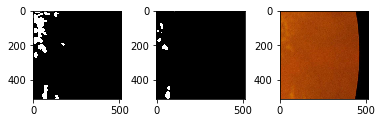

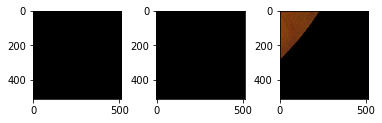

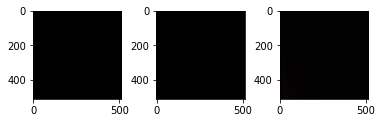

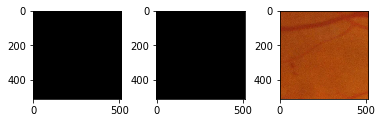

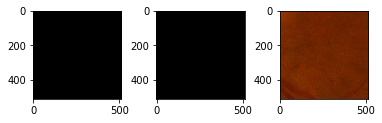

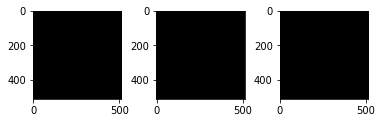

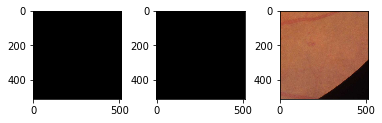

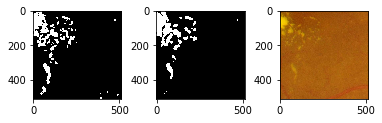

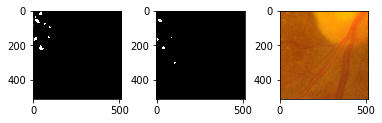

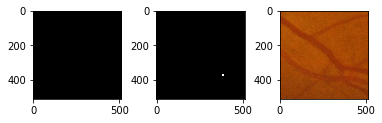

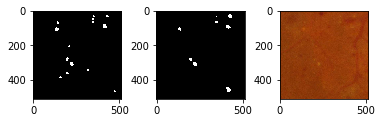

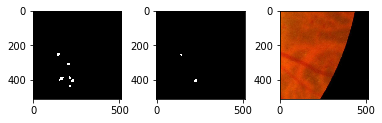

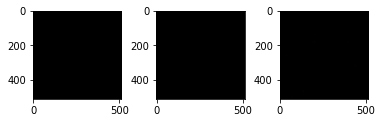

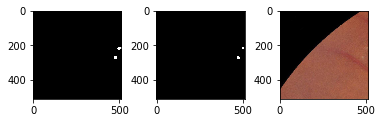

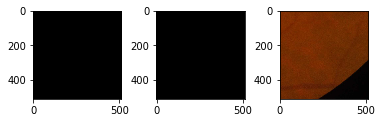

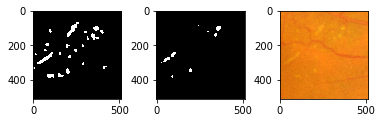

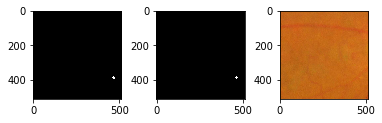

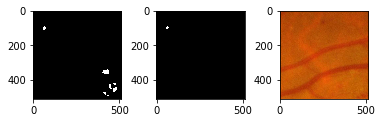

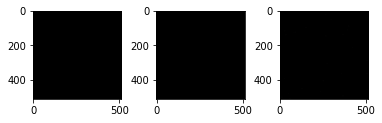

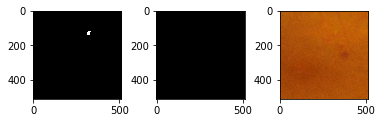

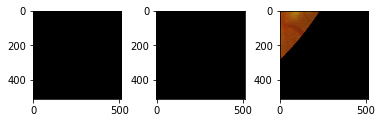

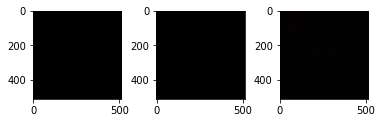

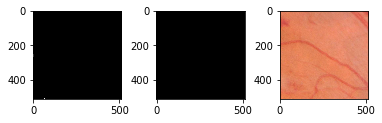

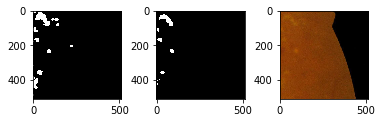

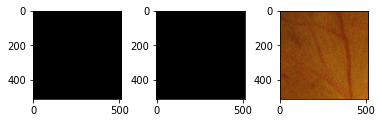

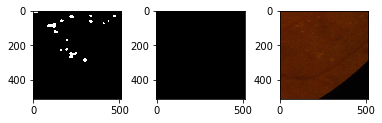

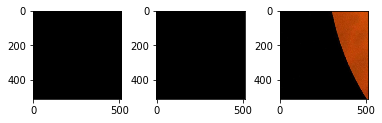

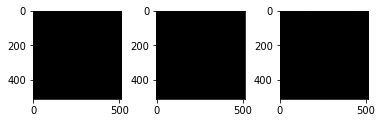

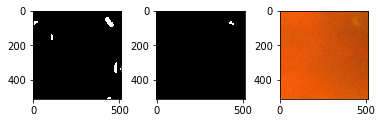

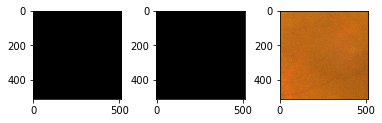

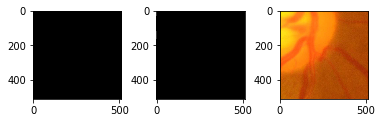

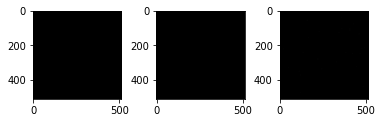

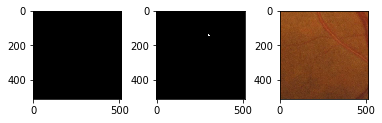

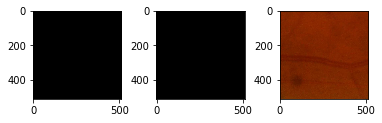

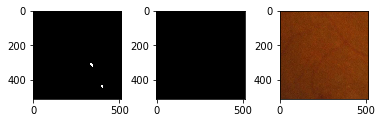

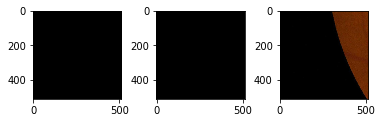

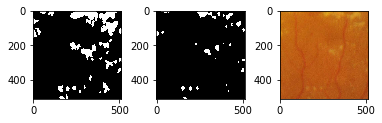

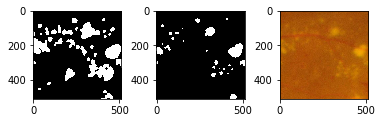

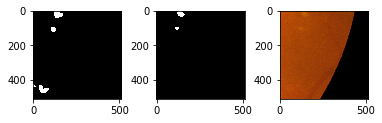

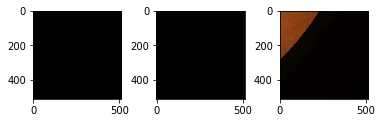

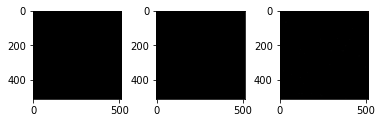

In [ ]:
from scipy.special import expit
for j in range(20):
  #x,y=gen_TEST.__getitem__(j)
  x,y=gen.__getitem__(j)
  mask_pred = model.predict(np.array(x))
  for i in range(1):
    #mask_pred= np.squeeze(mask_pred)
    #print(mask_pred[1])
    #mask_pred= expit(mask_pred)
    #print(mask_pred)
    mask_pred=(mask_pred >0.5).astype('uint8')
    
    mask_pred=(mask_pred)*255
    #print(mask_pred[1])
  #mask_pred = Image.fromarray(mask_pred)
  #mask_pred=plt.imread(mask_pred)
  #plt.imshow(mask_pred,cmap="gray")
  #plt.show()
  #print(mask_pred[1])
  #print(mask_pred.shape)
  #img = Image.fromarray((predicted.astype('uint8'))*255)
  for i in range(4):
      fig = plt.figure()
      fig.subplots_adjust(hspace=0.4, wspace=0.4)

      ax = fig.add_subplot(1, 3, 1)
      ax.imshow(np.reshape(y[i], (512, 512)), cmap="gray")

      ax = fig.add_subplot(1, 3, 2)
      ax.imshow(np.reshape(mask_pred[i], (512,512)),cmap="gray")
      ax = fig.add_subplot(1, 3, 3)
      ax.imshow(np.reshape(x[i], (512,512,3)), cmap="gray")
      plt.show()

In [ ]:
model.evaluate(valid_gen)

125/125 [==============================] - 10s 82ms/step - loss: 0.0384 - acc: 0.9904


[0.03840964881330729, 0.99044585]